<a href="https://colab.research.google.com/github/Baljeet942000/Book-Recommender-System/blob/main/Copy_of_Book_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name :- Book Recommender System**

### **Project Type** - Unsupervised ML

### **Contribution**- Individual

### **Project Description** ###

* During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives.

* From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

* In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

* Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.

* The main objective of this project  is to create a book recommendation system for users.



### **Dataset Description**

The Book recommender system dataset comprises of 3 files :

1.**Users:**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

2.**Books:**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

3.**Ratings:**

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

### Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics
import warnings
warnings.filterwarnings('ignore')
import re

### Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Books = pd.read_csv("/content/drive/MyDrive/Book recmendor data set/Books.csv")

In [ ]:
Ratings = pd.read_csv("/content/drive/MyDrive/Book recmendor data set/Ratings.csv")

In [ ]:
Users = pd.read_csv( "/content/drive/MyDrive/Book recmendor data set/Users.csv")

### Data information ###

In [ ]:
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
Books.shape

(271360, 8)

In [ ]:
Ratings.shape

(1149780, 3)

In [ ]:
Users.shape

(278858, 3)

In [ ]:
Books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
Users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
Ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
Books.duplicated().sum()

0

In [ ]:
Users.duplicated().sum()

0

In [ ]:
Ratings.duplicated().sum()

0

### Feature engineering ###

In [ ]:
Books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
# Removing unnecessary features from books dataframe.
Books = Books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-L']]


In [ ]:
Books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
# Count of null values in users dataframe.
# Age column has so many missing values.
# We will drop Age column from the dataframe as it is not required for further analysis.

Users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
# Removing 'Age' from users dataframe.

Users.drop('Age', axis=1, inplace=True)

In [ ]:
# Checking unique values of year of publication.
Books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
# In 'Year-Of-Publication' column we have years such as 0,2050,2038 and 2026 ,which does not make any sense.
# So we will simply drop the 'Year-Of-Publication' column as it is also not required for further analysis.

Books.drop('Year-Of-Publication', axis=1, inplace=True)

## Exploratory Data Analysis

**1. Books ratings vs count**

In [ ]:
# Ratings dataset should have only those books which exist in our books dataset, unless new books are added to books dataset.
ratings_new = Ratings[Ratings.ISBN.isin(Books.ISBN)]

In [ ]:
Rating_count = pd.DataFrame(ratings_new.groupby('Book-Rating')['Book-Rating'].agg('count'))
Rating_count.rename(columns = {'Book-Rating':'count'},inplace=True)
Rating_count

,count
Book-Rating,
0,647294
1,1481
2,2375
3,5118
4,7617
5,45355
6,31687
7,66402
8,91804


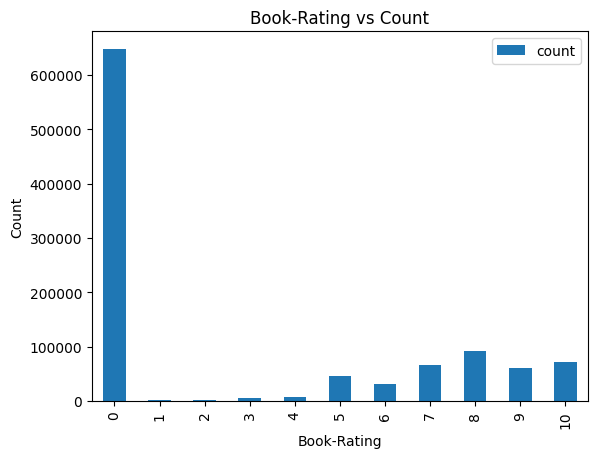

In [ ]:
# Creating a barplot.
Rating_count.plot(kind='bar')
plt.title('Book-Rating vs Count')
plt.ylabel('Count')
plt.xlabel('Book-Rating')
plt.rcParams['figure.figsize'] = (10, 5)


* 0 ratings have highest count which means that most of the users have given zero ratings.
* After 0 there are a great many numbers of users who have given 8 ratings.
* 1 ratings have lowest count which means that extremely less number of users have given a single rating to any book.

**2. Top 10 most highly rated authors (with respect to number of ratings)**

In [ ]:
# Merging Books and Ratings dataframe.
Book_ratings = Ratings.merge(Books, on='ISBN')

In [ ]:
# Doing groupby on Book-Author and calculating number of ratings for each Author.
rating_author = pd.DataFrame(Book_ratings.groupby('Book-Author')['Book-Rating'].count()).reset_index()
rating_author.rename(columns = {'Book-Rating':'Numbers-of-ratings'},inplace=True)

In [ ]:
# Top 10 most highly rated Book-Authors.
Top10_authors = rating_author.sort_values(by='Numbers-of-ratings', ascending=False).head(10)


In [ ]:
Top10_authors

,Book-Author,Numbers-of-ratings
90802,Stephen King,10053
73021,Nora Roberts,8429
48763,John Grisham,6010
42799,James Patterson,5845
66135,Mary Higgins Clark,4777
21432,Dean R. Koontz,4313
95760,Tom Clancy,4036
19266,Danielle Steel,3726
91815,Sue Grafton,3457
43814,Janet Evanovich,3350


<Axes: xlabel='Numbers-of-ratings', ylabel='Book-Author'>

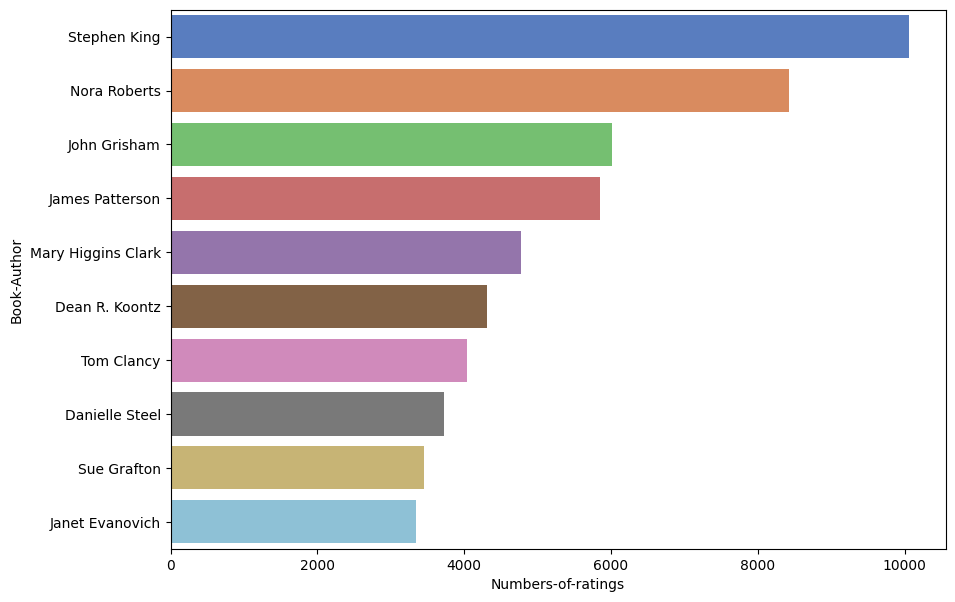

In [ ]:
# Creating a barplot.
plt.figure(figsize=(10,7))

sns.barplot(x='Numbers-of-ratings',y='Book-Author',palette="muted",data=Top10_authors)

* Stephen King is the most highly rated author i.e he has the maximum numbers of ratings as compared to the other authors.
* These are top ten most famous authors having a huge readers base.

**3. Top 10 most highly rated books (with respect to number of ratings)**

In [ ]:
# Doing groupby on Book-Title and calculating number of ratings for each Book.
rating_books = pd.DataFrame(Book_ratings.groupby('Book-Title')['Book-Rating'].count()).reset_index()
rating_books.rename(columns = {'Book-Rating':'Numbers-of-ratings'},inplace=True)

In [ ]:
# Top 10 most highly rated Books.
Top10_books = rating_books.sort_values(by='Numbers-of-ratings', ascending=False).head(10)


In [ ]:
Top10_books

,Book-Title,Numbers-of-ratings
234951,Wild Animus,2502
196326,The Lovely Bones: A Novel,1295
183573,The Da Vinci Code,898
5303,A Painted House,838
199237,The Nanny Diaries: A Novel,828
27922,Bridget Jones's Diary,815
206502,The Secret Life of Bees,774
52983,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740
204387,The Red Tent (Bestselling Backlist),723
14392,Angels &amp; Demons,670


<Axes: xlabel='Numbers-of-ratings', ylabel='Book-Title'>

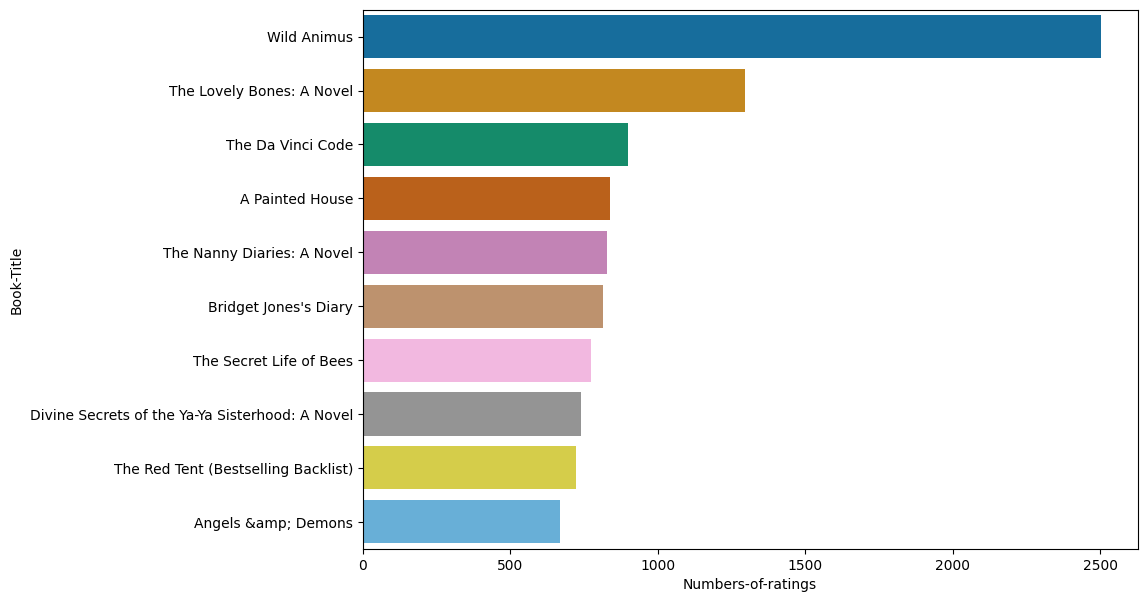

In [ ]:
# Creating a barplot.
plt.figure(figsize=(10,7))

sns.barplot(x='Numbers-of-ratings',y='Book-Title',palette="colorblind",data=Top10_books)

* Wild Animus is the most highly rated book with respect to the number of ratings.

**4. Top 10 most highly rated Publishers (with respect to number of ratings)**

In [ ]:
# Doing groupby on Publisher and calculating number of ratings for each Publisher.
publisher_ratings = pd.DataFrame(Book_ratings.groupby('Publisher')['Book-Rating'].count()).reset_index()
publisher_ratings.rename(columns = {'Book-Rating':'Numbers-of-ratings'},inplace=True)

In [ ]:
# Top 10 Publishers.
publisher_ratings_df = publisher_ratings.sort_values(by='Numbers-of-ratings', ascending=False).head(10)


<Axes: xlabel='Numbers-of-ratings', ylabel='Publisher'>

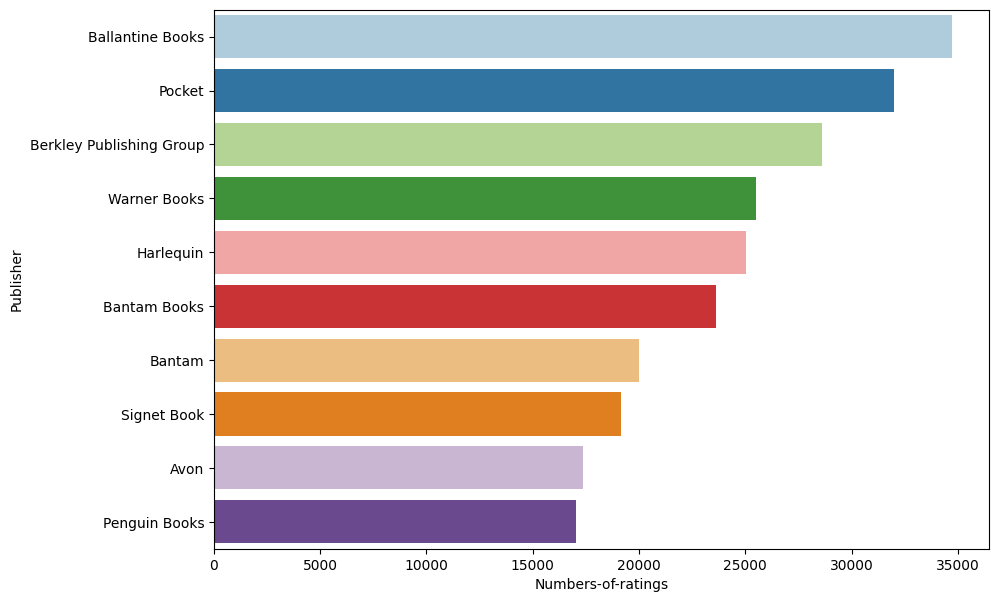

In [ ]:
# Creating a barplot.
plt.figure(figsize=(10,7))

sns.barplot(x='Numbers-of-ratings',y='Publisher',palette="Paired",data=publisher_ratings_df)

* Ballantine Books is the most highly rated publisher.

**5. Top 10 Authors (with respect to numbers of books published)**

In [ ]:
# Doing groupby on Book-Author and calculating number of books written by each author.
top_authors = pd.DataFrame(Book_ratings.groupby('Book-Author')['Book-Title'].count()).reset_index()
top_authors.rename(columns = {'Book-Title':'Numbers-of-Books'},inplace=True)


In [ ]:
# Top 10 authors.
top_10_authors_df = top_authors.sort_values(by='Numbers-of-Books', ascending=False).head(10)
top_10_authors_df

,Book-Author,Numbers-of-Books
90802,Stephen King,10053
73021,Nora Roberts,8429
48763,John Grisham,6010
42799,James Patterson,5845
66135,Mary Higgins Clark,4777
21432,Dean R. Koontz,4313
95760,Tom Clancy,4036
19266,Danielle Steel,3726
91815,Sue Grafton,3457
43814,Janet Evanovich,3350


<Axes: xlabel='Numbers-of-Books', ylabel='Book-Author'>

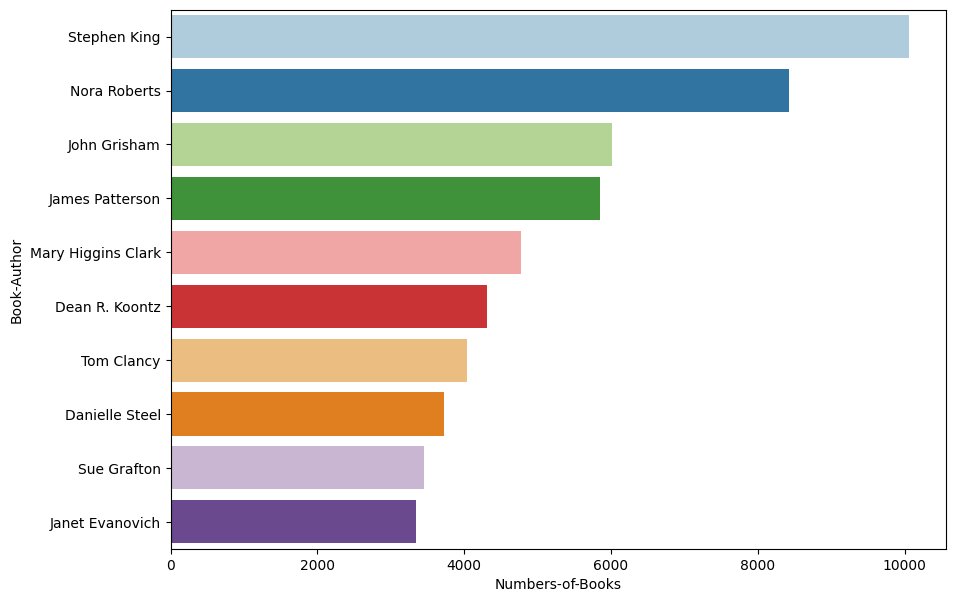

In [ ]:
# Creating a barplot.
plt.figure(figsize=(10,7))

sns.barplot(x='Numbers-of-Books',y='Book-Author',palette="Paired",data=top_10_authors_df)

**6. Top 10 Books with highest average ratings.**

In [ ]:
# Considering only those books which have atleast 200 ratings.
rated_books = pd.DataFrame(Book_ratings.groupby('Book-Title')['Book-Rating'].count())
rated_books = rated_books[rated_books['Book-Rating'] >= 200]
rated_books.rename(columns = {'Book-Rating':'num_ratings'},inplace=True)

In [ ]:
# Dataframe containing books having atleast 200 ratings.
rated_books

,num_ratings
Book-Title,
1984,284
1st to Die: A Novel,509
2nd Chance,356
A Bend in the Road,346
A Case of Need,236
...,...
Wild Animus,2502
Wish You Well,234
Without Remorse,203


In [ ]:
# Doing groupby on Book-Title and calculating average ratings for each book.
top_books = pd.DataFrame(Book_ratings[Book_ratings['Book-Title'].isin(rated_books.index.values)].groupby('Book-Title')['Book-Rating'].mean()).reset_index()
top_books.rename(columns = {'Book-Rating':'Avg-Rating'},inplace=True)

In [ ]:
# Top 10 Books with highest average ratings.
top_10_books_df = top_books.sort_values(by='Avg-Rating', ascending=False).head(10)
top_10_books_df

,Book-Title,Avg-Rating
93,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804
91,Harry Potter and the Goblet of Fire (Book 4),5.824289
94,Harry Potter and the Sorcerer's Stone (Book 1),5.737410
92,Harry Potter and the Order of the Phoenix (Boo...,5.501441
67,Ender's Game (Ender Wiggins Saga (Paperback)),5.409639
90,Harry Potter and the Chamber of Secrets (Book 2),5.183453
215,The Hobbit : The Enchanting Prelude to The Lor...,5.007117
202,The Fellowship of the Ring (The Lord of the Ri...,4.948370
95,Harry Potter and the Sorcerer's Stone (Harry P...,4.895652
264,"The Two Towers (The Lord of the Rings, Part 2)",4.880769


<Axes: xlabel='Avg-Rating', ylabel='Book-Title'>

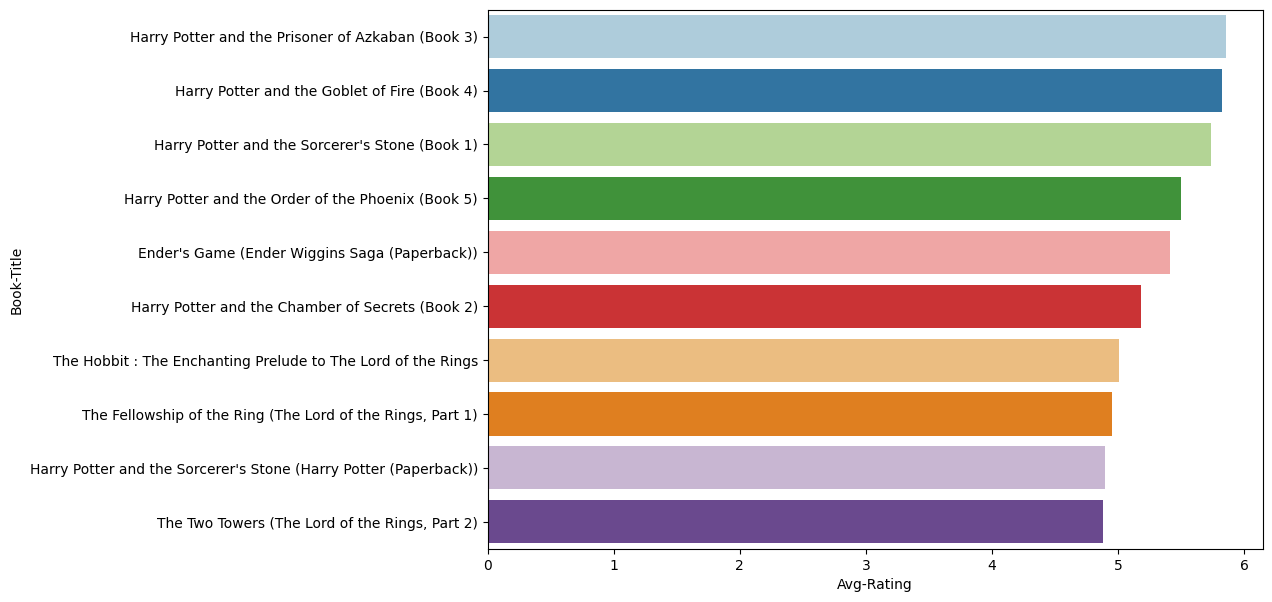

In [ ]:
# Creating a barplot.
plt.figure(figsize=(10,7))

sns.barplot(x='Avg-Rating',y='Book-Title',palette="Paired",data=top_10_books_df)

## Popularity Based Recommender System

In [ ]:
# Merging Books and Ratings dataframe.
# This will give us a new dataframe with names of all the books along with their ratings.

Books_Ratings = Ratings.merge(Books,on='ISBN')
Books_Ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,Apple,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...


In [ ]:
# Now we will do groupby on top of Book-Title and will find total number of ratings for each book.

num_ratings = Books_Ratings.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_ratings.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_ratings



,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [ ]:
# Creating a new dataframe with average ratings for each book.

avg_ratings = Books_Ratings.groupby('Book-Title')['Book-Rating'].agg('mean').reset_index()
avg_ratings.rename(columns={'Book-Rating':'avg_ratings'},inplace=True)
avg_ratings

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [ ]:
# Merging num_ratings and avg_ratings dataframe.

popular_df = num_ratings.merge(avg_ratings,on="Book-Title")
popular_df

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [ ]:
# We will consider only those books from our popular_df dataframe that have atleast 250 number of ratings.
# Below is a new dataframe with top 50 most popuplar books.

popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_ratings',ascending=False).head(50)
popular_df

,Book-Title,num_ratings,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [ ]:
# Merging popular_df with Books dataframe.
# Below is the final popular_dataframe with top 50 most popular books.

popular_df = popular_df.merge(Books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_ratings']]
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


## Collaborative Filtering Based Recommender System

In [ ]:
# We will consider only those users in our Books_Ratings dataframe that have rated atleast 200 books.
# Ratings by highly experienced users(or readers) will be of a great help for creating a more intelligent and efficient recommender system.

x = Books_Ratings.groupby('User-ID').count()['Book-Rating'] > 200
experienced_users = x[x].index

In [ ]:
filtered_rating = Books_Ratings[Books_Ratings['User-ID'].isin(experienced_users)]
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


In [ ]:
# We will consider only those books that have been rated by atleast 50 users.
# This will filter out not so famous books.

y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [ ]:
# final ratings dataframe containing famous books that have been rated by atleast 50 most experienced users.
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

# Creating a pivot table.
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pt.fillna(0,inplace=True)
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# importing cosine similarity from sklearn.
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Finding similarity scrores of all the books in the pivot table.
similarity_scores = cosine_similarity(pt)

In [ ]:
similarity_scores.shape

(706, 706)

In [ ]:
# Creating a recommender function.
def recommend(book_name):
  # index fetch
  index = np.where(pt.index==book_name)[0][0]
  similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]

  for i in similar_items:
    print(pt.index[i[0]])



In [ ]:
# Our final recommender system.
recommend('1984')

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


## Dumping files

In [ ]:
# importing pickle

import pickle

In [ ]:
# Image_url dataframe contains image urls for all the books along with their tittle.

Image_url = Books[['Book-Title','Image-URL-L']]

In [ ]:
# Selecting image urls only of the famous books.

Image_url = Image_url[Image_url['Book-Title'].isin(famous_books)]

In [ ]:
# Dumping Image_url dataframe as a pickle file.

pickle.dump(Image_url,open('Image_URL.pkl','wb'))

In [ ]:
# Dumping books pivot table.

pickle.dump(pt,open('Books.pkl','wb'))

In [ ]:
# Dumping similarity_scores.

pickle.dump(similarity_scores,open('similarity.pkl','wb'))

## Conclusion

* In the start of the project we conducted an initial exploratory data analysis and visualisation. And found following insights :


 1. Stephen King is the most highly rated author i.e he has the maximum numbers of ratings as compared to the other authors.

 2. Top 10 most highly rated books (with respect to number of ratings) are Wild
     Animus, The Da Vinci Code, A Painted House etc.

 3. Ballantine Books is the most highly rated publisher (with respect to number of ratings).

 4. Top 10 Authors (with respect to numbers of books published) includes authors
   such as Stephen King, Nora Roberts, John Grisham, James Patterson etc.

 5. Top 10 Books with highest average ratings includes books such as Harry Potter series, The Fellowship of the Ring, The Two Towers etc.

* Then we explored popularity based recommender system approach and created a dataframe consisting of top 50 most popular books with respect to the numbers of ratings.

* Then at last we created a collaborative filtering based recommender system function that takes the name of a book as input and suggests five similar books according to the similarity scores of books.


